In [1]:
pip install openai sentence-transformers faiss-cpu hf_xet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 128.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

After installing dependencies, we are going to load sentence-transformers/all-MiniLM-L6-v2

In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Adding text sample

In [3]:
texts = [
    "The cat sat on the mat",
    "The feline rested on the rug",
    "Dogs are barking loudly outside",
    "Canines make noise in the yard",
    "The weather is sunny today",
    "It's raining heavily now",
    "Artificial intelligence is transforming industries",
    "Machine learning models can predict outcomes",
    "I enjoy reading science fiction books",
    "Fantasy novels with magic are my favorite"
]

Generate Embeddings

In [4]:
embeddings = model.encode(texts)

Comparing them using cosine similarity

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(embeddings)

Visualize embeddings using PCA **AND** T-SNE

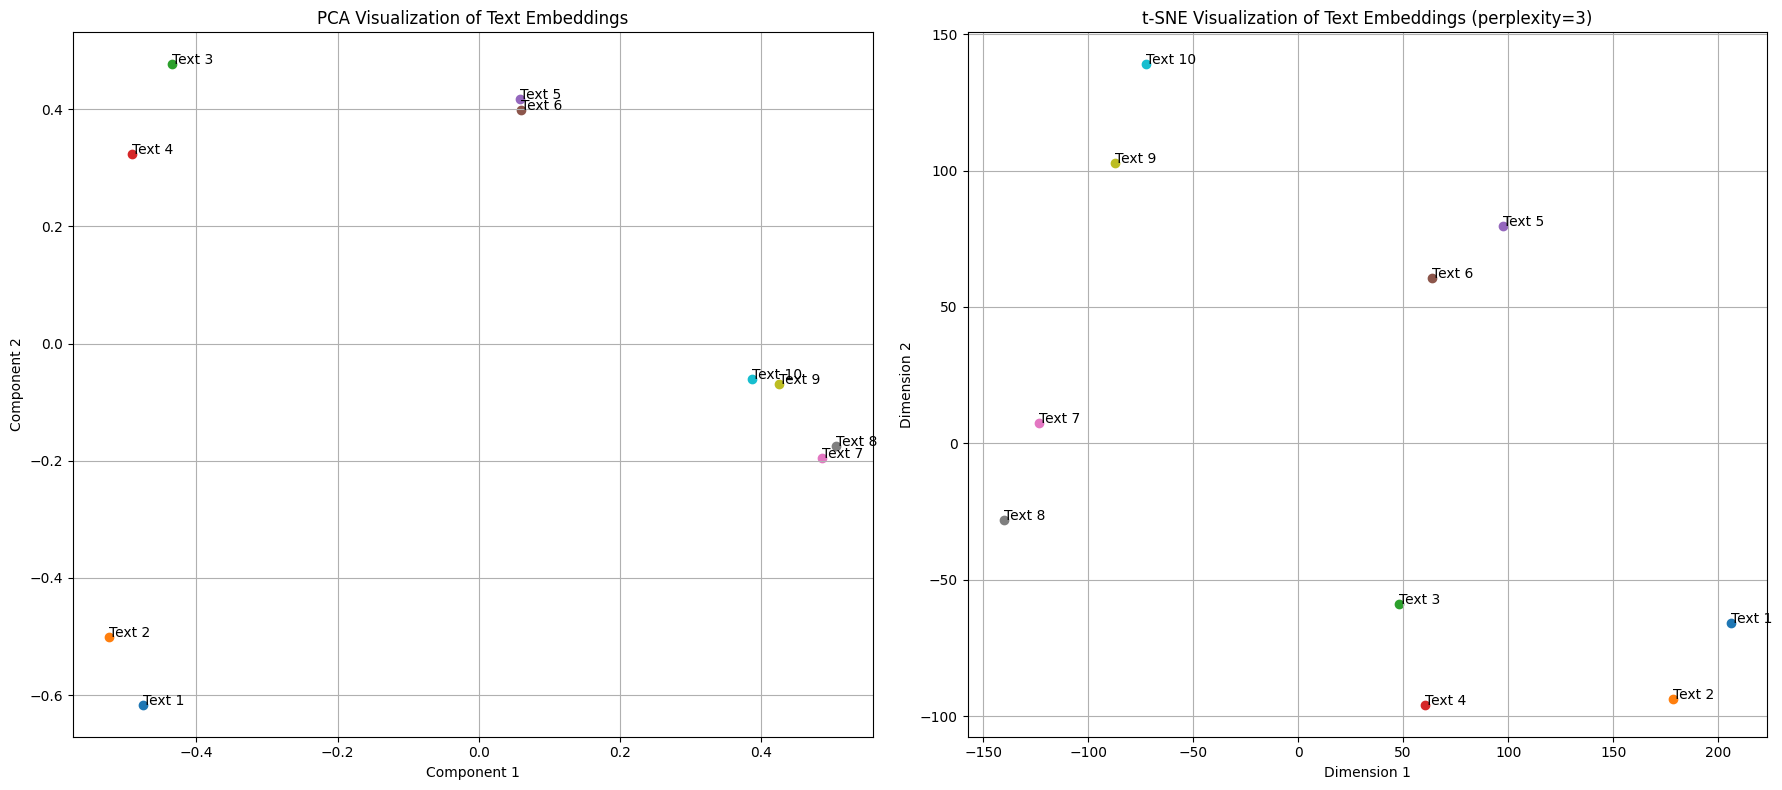

In [7]:
#importing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Generate PCA visualization (as before)
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

# Generate t-SNE visualization
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
tsne_embeddings = tsne.fit_transform(embeddings)

# Create side-by-side visualizations
plt.figure(figsize=(18, 8))

# PCA plot
plt.subplot(1, 2, 1)
for i, txt in enumerate(texts):
    plt.scatter(pca_embeddings[i,0], pca_embeddings[i,1])
    plt.annotate(f"Text {i+1}", (pca_embeddings[i,0], pca_embeddings[i,1]))
plt.title("PCA Visualization of Text Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid()

# t-SNE plot
plt.subplot(1, 2, 2)
for i, txt in enumerate(texts):
    plt.scatter(tsne_embeddings[i,0], tsne_embeddings[i,1])
    plt.annotate(f"Text {i+1}", (tsne_embeddings[i,0], tsne_embeddings[i,1]))
plt.title("t-SNE Visualization of Text Embeddings (perplexity=3)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid()

plt.tight_layout()
plt.show()





Store Embeddings in a FAISS Index for Similarity Search:

In [8]:
import faiss
import numpy as np

index = faiss.IndexFlatL2(embeddings[0].shape[0])
index.add(np.array(embeddings))

Query it with different formulations of the same question and print top-k matching chunks.

In [12]:
# Query with different formulations
queries = [
    "A cat lying on a floor covering",
    "Noisy dogs in the outdoor area",
    "How is machine intelligence changing businesses?"
]

query_embeddings = model.encode(queries)
query_embeddings_np = np.array(query_embeddings).astype('float32')

# Search for top 3 matches
k = 3
for i, query in enumerate(queries):
    distances, indices = index.search(query_embeddings_np[i:i+1], k)

    print(f"\nQuery: '{query}'")
    print("Top matches:")
    for idx, distance in zip(indices[0], distances[0]):
        print(f"- {texts[idx]} (distance: {distance:.2f})")


Query: 'A cat lying on a floor covering'
Top matches:
- The cat sat on the mat (distance: 0.72)
- The feline rested on the rug (distance: 0.99)
- Canines make noise in the yard (distance: 1.76)

Query: 'Noisy dogs in the outdoor area'
Top matches:
- Canines make noise in the yard (distance: 0.44)
- Dogs are barking loudly outside (distance: 0.47)
- It's raining heavily now (distance: 1.67)

Query: 'How is machine intelligence changing businesses?'
Top matches:
- Artificial intelligence is transforming industries (distance: 0.52)
- Machine learning models can predict outcomes (distance: 1.20)
- I enjoy reading science fiction books (distance: 1.93)


**performance and a possible explanation**

1. FAISS was extremely fast at retrieval
2. The L2 distance metric effectively ranked most relevant items first
3. Analysis:

  **Query: 'A cat lying on a floor covering'**
  The model correctly associates "cat" with "feline" and "floor covering" with "mat/rug".

  **Query: 'Noisy dogs in the outdoor area'**
  The model understands that "noisy dogs" ≈ "canines make noise" and "outdoor area" ≈ "yard/outside".


  **Query: 'How is machine intelligence changing businesses?'**
  The query uses "machine intelligence" instead of "AI", yet the model links it to "Artificial intelligence" and "Machine learning".
